In [116]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [117]:
# Loading Data
user_engagement  = pd.read_csv('takehome_user_engagement.csv')
takehome_user = pd.read_csv('takehome_users.csv', encoding = 'latin') #Getting the data loaded

In [118]:
user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [119]:
takehome_user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [120]:
user_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [121]:
takehome_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [122]:
# selecting only the users who appear at least 3 times 
user_engagement = user_engagement.groupby('user_id').filter(lambda x: len(x) >= 3)

In [123]:
# Reset Index
user_engagement.reset_index(drop=True, inplace = True)

In [124]:
# Sample data
user_engagement.head()

,time_stamp,user_id,visited
0,2013-11-15 03:45:04,2,1
1,2013-11-29 03:45:04,2,1
2,2013-12-09 03:45:04,2,1
3,2013-12-25 03:45:04,2,1
4,2013-12-31 03:45:04,2,1


In [125]:
# This sequence runs through the dataframe, creates a week from a date, and then checks if the next two dates fall within that
#time. Then it ouputs the user_id to a list.

active_user = 0
active_users = []

# Skip last 2 entries as we are comparing 1st and 3rd
for i in range(len(user_engagement)-2):
    
    # Get current user_id
    user = user_engagement['user_id'][i]
    
    # Skip active user and compare to the next user
    if user != active_user and user == user_engagement['user_id'][i+1]:
        # Get start date
        start_date = pd.Timestamp(user_engagement['time_stamp'][i]) 
        
        # End date is start date plus 7 days
        end_date = start_date + pd.Timedelta('7D') 
        
        if start_date < pd.Timestamp(user_engagement['time_stamp'][i+1]) < end_date and start_date < pd.Timestamp(user_engagement['time_stamp'][i+2]) < end_date:
            
            # Active user found and append it to the list
            active_users.append(user)  
            
            # Set active user 
            active_user = user      

In [133]:
# Created data frame of adopted users
data = {'object_id': active_users, 'adopted_user':1}
adopted_df = pd.DataFrame(data)

In [134]:
adopted_df.head()

,object_id,adopted_user
0,2,1
1,10,1
2,20,1
3,33,1
4,42,1


In [135]:
# Join adoptd user df with takehome_user
result = pd.merge(takehome_user,adopted_df,on='object_id', how='left')

In [137]:
# Fill NaN with zeros (non adopted user)
result['adopted_user'] = result['adopted_user'].fillna(0)

In [138]:
# View sample data
result.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0


In [139]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [143]:
X = result[['last_session_creation_time','opted_in_to_mailing_list','enabled_for_marketing_drip','org_id']]
y=  result['adopted_user']

In [144]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.7, random_state=42)

# Create model instance
model = XGBClassifier()

#Fit model
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Text(0, 0.5, 'Feature Importance Score')

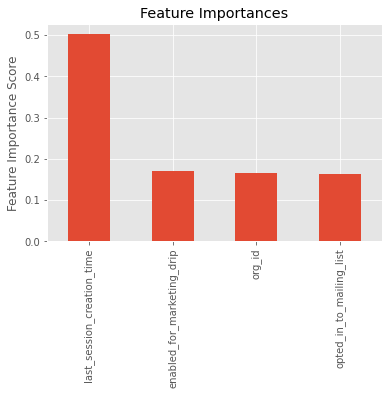

In [145]:
# Featue Importance  
feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [146]:
# Predictions for test data
y_pred = model.predict(X_test)

predictions = [round(value) for value in y_pred]

# Evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 91.04%


Conclusion: Model can predict an adopted_user with 91% accuracy. Most important features for the prediction is the "last session creation time". 